In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
coloums_names=("user_id", "item_id", "ratings", "timestamp")

In [5]:
u_data=pd.read_csv("u.data.csv",sep="\t", names=coloums_names)

In [6]:
u_data.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
print(u_data.head(10))

   user_id  item_id  ratings  timestamp
0        0       50        5  881250949
1        0      172        5  881250949
2        0      133        1  881250949
3      196      242        3  881250949
4      186      302        3  891717742
5       22      377        1  878887116
6      244       51        2  880606923
7      166      346        1  886397596
8      298      474        4  884182806
9      115      265        2  881171488


In [8]:
movie_titels=pd.read_csv("Movie_Id_Titles.csv")

In [9]:
movie_titels.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


Merge them together

In [14]:
dataframe=pd.merge(u_data, movie_titels, on="item_id" )

In [15]:
dataframe.head(10)

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


Visualization the data

In [12]:
sns.set_style("white")

In [16]:
dataframe.groupby("title")["ratings"].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: ratings, dtype: float64

In [17]:
dataframe.groupby("title")["ratings"].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: ratings, dtype: int64

# creating a ratings dataframe 

In [18]:
ratings=pd.DataFrame(dataframe.groupby("title")["ratings"].mean())

In [19]:
ratings.head(10)

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


Set the no.of rating

In [22]:
ratings["rating_numbers"]=pd.DataFrame(dataframe.groupby("title")["ratings"].count())

In [23]:
ratings.head(10)

,ratings,rating_numbers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


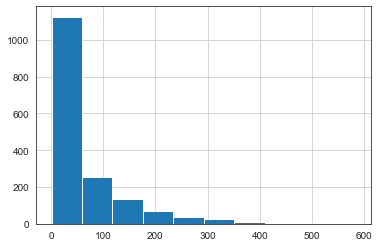

In [26]:
ratings["rating_numbers"].hist()

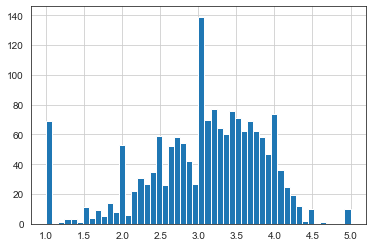

In [29]:
ratings["ratings"].hist(bins=50)

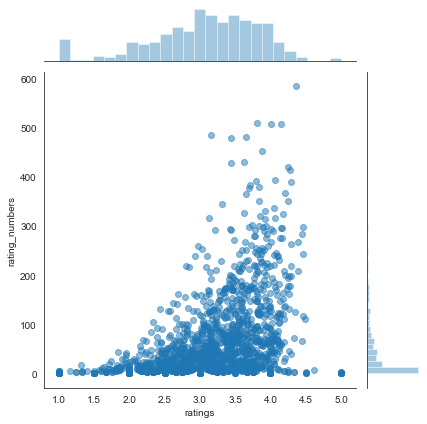

In [32]:
sns.jointplot(x="ratings", y="rating_numbers",data=ratings, alpha=0.5)

Recommending similar movies

In [36]:
moviemat = dataframe.pivot_table(index="user_id", columns="title", values="ratings")

In [37]:
moviemat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movies

In [38]:
ratings.sort_values("rating_numbers",ascending=False).head(10)

,ratings,rating_numbers
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Lets chose two movies for our system

In [43]:
starwars_user_ratings = moviemat["Star Wars (1977)"]
Fargo_user_ratings = moviemat['Fargo (1996)']

In [42]:
starwars_user_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [44]:
Fargo_user_ratings.head(10)

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
6    5.0
7    5.0
8    NaN
9    NaN
Name: Fargo (1996), dtype: float64

correlation

In [57]:
similar_to_starwar = moviemat.corrwith(starwars_user_ratings)
similar_to_starwar.head(10)

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

remove the null values

In [59]:
similra_to_Fargo = moviemat.corrwith(Fargo_user_ratings)
similra_to_Fargo.head(10)

title
'Til There Was You (1997)                      0.100000
1-900 (1994)                                   0.866025
101 Dalmatians (1996)                         -0.245368
12 Angry Men (1957)                            0.098676
187 (1997)                                     0.142509
2 Days in the Valley (1996)                    0.338319
20,000 Leagues Under the Sea (1954)            0.270497
2001: A Space Odyssey (1968)                   0.299882
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.008565
dtype: float64

In [49]:
corr_starwars = pd.DataFrame(similar_to_starwar, columns=["correlation"])
corr_starwars.dropna(inplace=True)

In [50]:
corr_starwars.head(10)

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


Perfectly correlated movies with StarWars

In [52]:
corr_starwars.sort_values("correlation", ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


In [54]:
corr_starwars = corr_starwars.join(ratings["rating_numbers"], how="left", lsuffix="_left", rsuffix="_right")
corr_starwars.head(10)

,correlation,rating_numbers
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [55]:
corr_starwars[corr_starwars["rating_numbers"]>100].sort_values("correlation",ascending=False).head(10)

,correlation,rating_numbers
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


Perfectly correlated movies with Fargo

In [60]:
corr_Fargo = pd.DataFrame(similra_to_Fargo, columns=["correlation"])
corr_Fargo.head(10)

,correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509
2 Days in the Valley (1996),0.338319
"20,000 Leagues Under the Sea (1954)",0.270497
2001: A Space Odyssey (1968),0.299882
3 Ninjas: High Noon At Mega Mountain (1998),NaN


Removing the null value

In [61]:
corr_Fargo.dropna(inplace=True)

In [62]:
corr_Fargo.head(10)

,correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509
2 Days in the Valley (1996),0.338319
"20,000 Leagues Under the Sea (1954)",0.270497
2001: A Space Odyssey (1968),0.299882
"39 Steps, The (1935)",0.008565


In [71]:
corr_fargo = corr_Fargo.join(ratings["rating_numbers"], how="left", lsuffix="_left", rsuffix="_right")
corr_Fargo.head()

,correlation,rating_numbers
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [73]:
corr_Fargo[corr_Fargo["rating_numbers"]>100].sort_values("correlation", ascending=False).head(10)

,correlation,rating_numbers
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
True Romance (1993),0.345781,104
Raging Bull (1980),0.344163,116
"People vs. Larry Flynt, The (1996)",0.341784,215
"Magnificent Seven, The (1954)",0.338462,121
